# Toy example

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tammo_lib as tl
import numpy as np
import ormachine
from importlib import reload

In [39]:
# generate toy data
X = 2*np.array([[0,0,0,1,1,1,0,0,0],[1,1,1,0,0,0,0,0,0],[0,0,0,1,1,1,1,1,1]])-1
X = np.concatenate(200*[X])

# initialise ormachine
orm = ormachine.machine()

# define model architecture
data = orm.add_matrix(val=X, sampling_indicator=False)
layer1 = orm.add_layer(size=3, child=data, lbda_init=1.5, u_density_conditions=[0,0,0,0])

In [40]:
orm.infer(no_samples=100, convergence_window=20,
          convergence_eps=1e-4, burn_in_min=100, 
          burn_in_max=500, fix_lbda_iters=20)

burning in markov chain...
	iteration: 240 recon acc.: 0.887
	converged at reconstr. accuracy: 0.887
allocating memory to save samples...
drawing samples...
	iteration 100; recon acc.: 0.889
finished.


## Inspect results

(<matplotlib.figure.Figure at 0x7f7f287ac198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7f2834a668>)

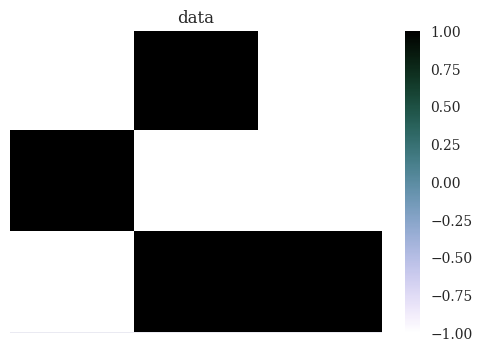

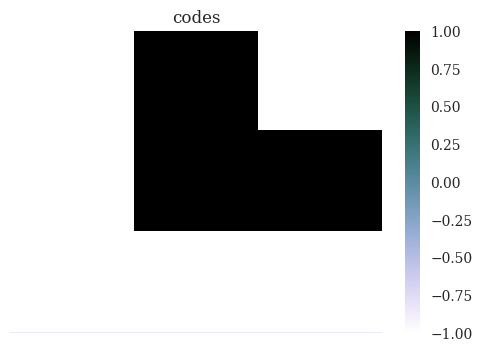

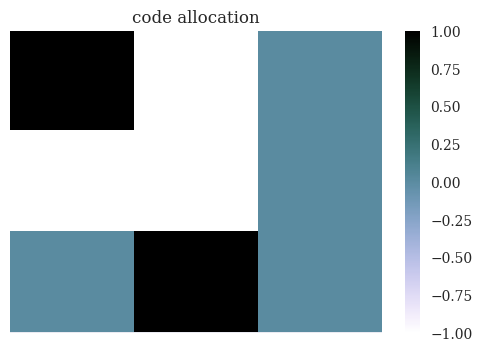

In [41]:
from scipy.special import expit
# plt.plot(expit(layer1.lbda.trace))
tl.plot_pattern(X[:3,:], vmin=-1, vmax=1, title='data')
tl.plot_pattern(layer1.u.mean().transpose(), vmin=-1, vmax=1, title='codes')
tl.plot_pattern(layer1.z.mean()[:3,:], title='code allocation', vmin=-1, vmax=1)


# Calculator digits

In [5]:
calc_orm = ormachine.machine()
calc_data = calc_orm.add_matrix(2*tl.calculator_digits(500)-1, sampling_indicator=False)
layer1 = calc_orm.add_layer(size=7, child=calc_data, max_u_density=[0,0], 
                            u_prior=.01, z_prior=.7, lbda_init=4)

calc_orm.infer(burn_in_min=100, burn_in_max=2000, no_samples=50, fix_lbda_iters=200)

import seaborn as sns
cmap = sns.cubehelix_palette(
            8, start=2, dark=0, light=1,
            reverse=False, as_cmap=True)

fig = plt.figure()

for i in range(layer1.u().shape[1]):
    ax = fig.add_subplot(1,layer1.u().shape[1],i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    im = ax.imshow(np.reshape(layer1.u.mean()[:,i], [17,10]), cmap=cmap,
                   interpolation='nearest', vmin=0, vmax=1)

TypeError: add_layer() got an unexpected keyword argument 'max_u_density'

In [ ]:
calc_orm.layers